In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import statsmodels.api as sm

In [49]:
import xlrd
xlsfile = pd.ExcelFile('SPEED.xls')

DF = xlsfile.parse('Sheet1')

In [50]:
wk = DF.loc[DF['gender']==0, ['iid', 'gender', 'match', 'attr', 'attr_o', 'sinc', 'sinc_o', 'intel', 'intel_o', 
                             'fun', 'fun_o', 'amb', 'amb_o', 'shar', 'shar_o']]

In [51]:
wk = wk.dropna(axis=0)

In [52]:
wk['attr_2avg']=abs((wk['attr']+wk['attr_o'])/2)
wk['sinc_2avg']=abs((wk['sinc']+wk['sinc_o'])/2)
wk['intel_2avg']=abs((wk['intel']+wk['intel_o'])/2)
wk['fun_2avg']=abs((wk['fun']+wk['fun_o'])/2)
wk['amb_2avg']=abs((wk['amb']+wk['amb_o'])/2)
wk['shar_2avg']=abs((wk['shar']+wk['shar_o'])/2)

In [53]:
wk = wk.drop(labels=['attr', 'attr_o', 'sinc', 'sinc_o', 'intel', 'intel_o', 'fun', 'fun_o','amb', 'amb_o', 'shar', 'shar_o'],
                     axis=1)
wk['intercept']=1.0

In [54]:
print('Speed Dating dataframe shape')
print(wk.shape)
print('Speed Dating dataframe column names')
print(wk.columns)
print('Speed Dating dataframe summary')
print(wk.describe())

Speed Dating dataframe shape
(3013, 10)
Speed Dating dataframe column names
Index(['iid', 'gender', 'match', 'attr_2avg', 'sinc_2avg', 'intel_2avg',
       'fun_2avg', 'amb_2avg', 'shar_2avg', 'intercept'],
      dtype='object')
Speed Dating dataframe summary
               iid  gender        match    attr_2avg    sinc_2avg  \
count  3013.000000  3013.0  3013.000000  3013.000000  3013.000000   
mean    277.457351     0.0     0.177896     6.216628     7.183704   
std     159.707690     0.0     0.382488     1.350864     1.281388   
min       1.000000     0.0     0.000000     1.500000     1.000000   
25%     148.000000     0.0     0.000000     5.500000     6.500000   
50%     267.000000     0.0     0.000000     6.500000     7.500000   
75%     417.000000     0.0     0.000000     7.000000     8.000000   
max     530.000000     0.0     1.000000    10.000000    10.000000   

        intel_2avg     fun_2avg     amb_2avg    shar_2avg  intercept  
count  3013.000000  3013.000000  3013.000000  3

In [55]:
indepv = wk.columns[3:] #only the attributes
logreg = sma.Logit(wk['match'],wk[indepv])
logfit = logreg.fit()

print(logfit.summary2())

sbn.set_style('whitegrid')

Optimization terminated successfully.
         Current function value: 0.357885
         Iterations 7
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.236      
Dependent Variable: match            AIC:              2170.6165  
Date:               2018-05-18 12:58 BIC:              2212.6914  
No. Observations:   3013             Log-Likelihood:   -1078.3    
Df Model:           6                LL-Null:          -1410.6    
Df Residuals:       3006             LLR p-value:      2.5748e-140
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     7.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
attr_2avg      0.5776    0.0591    9.7778  0.0000   0.4618   0.6933
sinc_2avg     -0.0624    0.0679   -0.9191  0.3581

In [56]:
#groupby 'match' column
wk.groupby('match').mean()

,iid,gender,attr_2avg,sinc_2avg,intel_2avg,fun_2avg,amb_2avg,shar_2avg,intercept
match,,,,,,,,,
0,279.132822,0.0,5.975959,7.047033,7.265038,6.178341,6.658862,5.222447,1.0
1,269.714552,0.0,7.328825,7.815299,7.974813,7.607743,7.354478,6.812966,1.0


In [57]:
from pandas import DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

#Machine Learning Imports
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

#For evaluating ML results
from sklearn import metrics

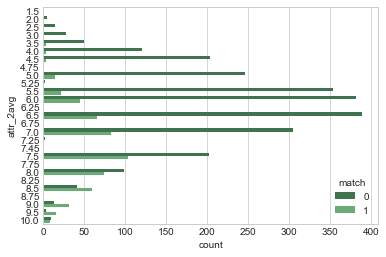

In [58]:
#Factorplot for attractiveness score average with match hue
sbn.countplot(y='attr_2avg', hue='match', data=wk, palette='Greens_d')

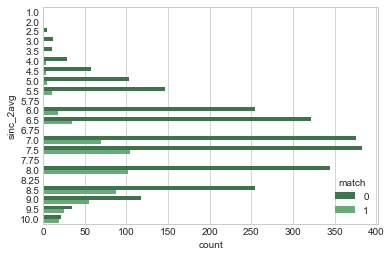

In [59]:
#Factorplot for sincerity score average with match hue
sbn.countplot(y='sinc_2avg', hue='match', data=wk, palette='Greens_d')

In [62]:
X = wk.drop(['match', 'iid', 'gender'], axis=1)
Y = wk.match

In [63]:
X.head()

,attr_2avg,sinc_2avg,intel_2avg,fun_2avg,amb_2avg,shar_2avg,intercept
0,6.0,8.5,7.5,7.5,7.0,5.5,1.0
1,7.0,8.0,8.5,7.5,6.0,5.5,1.0
2,7.5,9.0,9.5,9.0,7.5,8.5,1.0
3,7.0,7.0,8.5,7.5,7.5,8.0,1.0
4,6.5,6.5,8.0,6.5,7.5,6.5,1.0


In [64]:
Y.head()

0    0
1    0
2    1
3    1
4    1
Name: match, dtype: int64

In [65]:
#to use the Y with scikit learn, set it as 1-D array, flatten the array
Y = np.ravel(Y)

#check results
Y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [66]:
log_model = LogisticRegression()

#Fit our data
log_model.fit(X,Y)

#Check our accuracy
log_model.score(X,Y)

0.84732824427480913

In [68]:
#Check the percentage of a match
Y.mean()

0.17789578493196151

In [69]:
#Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

#Make a new log model
log_model2 = LogisticRegression()

#Now fit the new model
log_model2.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [70]:
#Predict the classes of the testing data set
class_predict = log_model2.predict(X_test)

#Compare the predicted classes to the actual test classes
print (metrics.accuracy_score(Y_test,class_predict))

0.855437665782
